## Importing the dependecies

In [1]:
# gym stuff
import gym
import gym_anytrading

#Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv #it is a wrapper
from stable_baselines import A2C #A2C is RL algorithm

#processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\Sumit\anaconda3\envs\tf1.5\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


## MarketWatch GME data

In [2]:
df = pd.read_csv('data/gme.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    253 non-null    object 
 1   Open    253 non-null    float64
 2   High    253 non-null    float64
 3   Low     253 non-null    float64
 4   Close   253 non-null    float64
 5   Volume  253 non-null    object 
dtypes: float64(4), object(2)
memory usage: 12.0+ KB


# Coverting date to datetimeformat

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Open    253 non-null    float64       
 2   High    253 non-null    float64       
 3   Low     253 non-null    float64       
 4   Close   253 non-null    float64       
 5   Volume  253 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 12.0+ KB


In [5]:
#Sorting the data from oldest to newest
df.sort_values('Date',ascending=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
252,2020-05-26,4.34,4.61,4.33,4.42,"3,545,926"
251,2020-05-27,4.57,4.71,4.36,4.69,"3,146,603"
250,2020-05-28,4.75,4.76,4.30,4.33,"2,184,367"
249,2020-05-29,4.33,4.42,4.05,4.06,"3,973,540"
248,2020-06-01,4.12,4.36,4.02,4.13,"2,618,424"


In [6]:
# Set index as date
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-26,4.34,4.61,4.33,4.42,"3,545,926"
2020-05-27,4.57,4.71,4.36,4.69,"3,146,603"
2020-05-28,4.75,4.76,4.30,4.33,"2,184,367"
2020-05-29,4.33,4.42,4.05,4.06,"3,973,540"
2020-06-01,4.12,4.36,4.02,4.13,"2,618,424"


In [7]:
env = gym.make('stocks-v0',df=df,frame_bound=(5,250),window_size=5)
#window_size = how many previous timestep data our bot is going to have for referce to make a trade
#frame_bound = specifies how much data we want to pass through our environment we are gonna start at 5th time step 
#and go all the way to the hundredth time_step . 

`Note since our window size is 5 and frame_bound's initial value is also 5 our env.prices will start from very first day i.e. 05/25/2021`

`And if our frame bound's initial value is changed to (10,100) from (5,100) our env.prices will start from 5 day later i.e. 05/18/2021`

In [8]:
print("(env.prices\n",env.prices)
print("env.signal_features\n",env.signal_features) #it shows price and change in price from previous timestep


(env.prices
 [  4.42   4.69   4.33   4.06   4.13   4.18   4.44   4.47   4.14   5.01
   4.96   5.07   4.37   4.72   4.69   4.64   4.76   4.95   4.88   4.87
   4.83   4.41   4.46   4.35   4.38   4.34   4.44   4.29   4.24   4.09
   4.26   4.21   4.34   4.26   4.08   4.19   4.17   3.96   3.85   4.01
   4.11   4.11   4.03   4.01   3.94   4.06   4.1    4.01   4.15   4.43
   4.63   4.43   4.16   4.33   4.35   4.52   4.64   4.75   4.63   4.81
   4.72   4.61   5.03   4.87   4.98   5.11   5.25   5.39   6.68   7.65
   7.71   7.82   7.65   7.7    7.35   6.23   6.09   6.91   7.09   8.68
   9.2    9.47   8.75  10.56  10.04   9.14  10.02  10.09  10.35  10.2
   9.77   9.39   9.46   9.13   9.36  13.49  12.02  11.8   11.88  12.25
  13.83  13.31  13.91  13.86  14.1   14.91  15.    13.45  12.69  11.82
  11.73  10.47  10.75  11.57  10.91  11.45  11.86  11.49  11.1   11.75
  11.13  11.01  12.06  11.63  11.57  12.46  12.71  13.9   13.67  14.75
  16.08  16.56  15.8   16.58  16.12  16.9   16.35  16.94  13.66  

## Build Environment

 n_state
[[ 1.6450e+02  1.9710e+01]
 [ 1.5992e+02 -4.5800e+00]
 [ 1.8060e+02  2.0680e+01]
 [ 1.8067e+02  7.0000e-02]
 [ 1.6883e+02 -1.1840e+01]]
 reward
0
  done
True
  info
{'total_reward': -197.08, 'total_profit': 0.48391600075604546, 'position': 0}
 


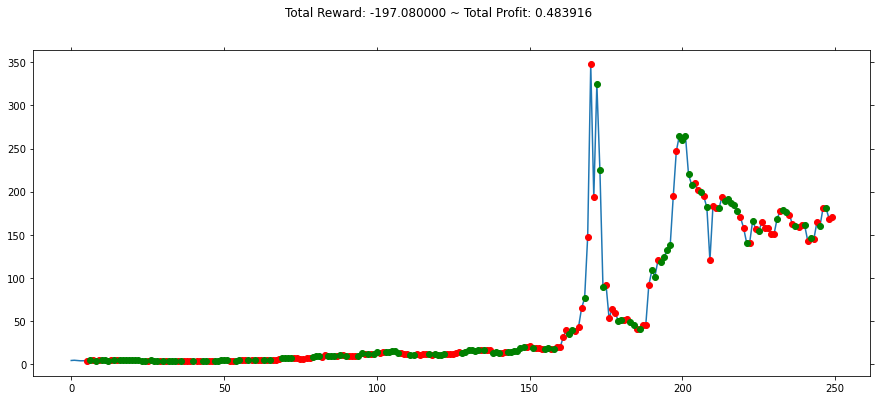

In [9]:
#Taking random steps/ Testing the env
state = env.reset() #it allows us to get initial state
while True:
    action = env.action_space.sample() #looping through each index and taking random action
    n_state,reward,done,info = env.step(action) #applying action to our environment. and storing them in variables
    if done: 
        print(f" n_state\n{n_state}\n reward\n{reward}\n  done\n{done}\n  info\n{info}\n ")
        
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [10]:
env.action_space #we have only 2 action buy and sell

Discrete(2)

# 3.1 - Add Custom Indicators

### 3.1.1 Install and Import New Dependencies

##### `We'll  be using finta`

In [11]:
# !pip install finta
from gym_anytrading.envs import StocksEnv
from finta import TA #Technical Analysis lirary


### 3.1.2 - Fix Volume Column

In [12]:
print(df.dtypes)
#inintially volume is object/string changing it to float
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",","")))

# (x.replace",","") stripping/removing all the commas


Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object


### 3.1.3 Calculate SMA,RSI and OBV

In [13]:
df['SMA'] = TA.SMA(df,12) #we want 12 period simple movimg average
df['RSI'] = TA.RSI(df) #relative strength index
df['OBV'] = TA.OBV(df) #on balance volume inndicator

df.fillna(0,inplace=True) #removing NAN with 0

In [14]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-05-26,4.34,4.61,4.33,4.42,3545926.0,0.000000,0.000000,0.0
2020-05-27,4.57,4.71,4.36,4.69,3146603.0,0.000000,100.000000,3146603.0
2020-05-28,4.75,4.76,4.30,4.33,2184367.0,0.000000,41.052632,962236.0
2020-05-29,4.33,4.42,4.05,4.06,3973540.0,0.000000,27.811300,-3011304.0
2020-06-01,4.12,4.36,4.02,4.13,2618424.0,0.000000,33.775199,-392880.0
2020-06-02,4.27,4.31,4.06,4.18,2369780.0,0.000000,37.732329,1976900.0
2020-06-03,4.24,4.52,4.20,4.44,3037424.0,0.000000,53.344156,5014324.0
2020-06-04,4.44,4.72,4.37,4.47,3514299.0,0.000000,54.753789,8528623.0
2020-06-05,4.29,4.41,4.09,4.14,6274428.0,0.000000,40.322021,2254195.0


#### 3.1.4 Create New Environment

In [15]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size #here env.frame_bound[0] = 5
    end = env.frame_bound[1] # here env.frame_bound[1] = 250
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:,['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end] 
    return prices,signal_features

In [16]:
#Creating custom env
class MyCustomEnv(StocksEnv): #inheritence is happening here
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df,window_size=12,frame_bound=(12,50)) #creating instance

In [18]:
env2.prices

array([4.33, 4.36, 4.3 , 4.05, 4.02, 4.06, 4.2 , 4.37, 4.09, 4.27, 4.55,
       4.68, 4.18, 4.39, 4.42, 4.51, 4.53, 4.65, 4.69, 4.72, 4.8 , 4.38,
       4.3 , 4.27, 4.3 , 4.2 , 4.31, 4.29, 4.19, 4.06, 4.03, 4.13, 4.18,
       4.26, 4.07, 4.13, 4.09, 3.94, 3.77, 3.88, 3.92, 4.06, 4.01, 3.95,
       3.92, 3.92, 3.97, 3.99, 4.  , 4.13])

In [19]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-05-26,4.34,4.61,4.33,4.42,3545926.0,0.0,0.000000,0.0
2020-05-27,4.57,4.71,4.36,4.69,3146603.0,0.0,100.000000,3146603.0
2020-05-28,4.75,4.76,4.30,4.33,2184367.0,0.0,41.052632,962236.0
2020-05-29,4.33,4.42,4.05,4.06,3973540.0,0.0,27.811300,-3011304.0
2020-06-01,4.12,4.36,4.02,4.13,2618424.0,0.0,33.775199,-392880.0


In [20]:
env2.signal_features

array([[ 4.33000000e+00,  3.54592600e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.36000000e+00,  3.14660300e+06,  0.00000000e+00,
         1.00000000e+02,  3.14660300e+06],
       [ 4.30000000e+00,  2.18436700e+06,  0.00000000e+00,
         4.10526316e+01,  9.62236000e+05],
       [ 4.05000000e+00,  3.97354000e+06,  0.00000000e+00,
         2.78113001e+01, -3.01130400e+06],
       [ 4.02000000e+00,  2.61842400e+06,  0.00000000e+00,
         3.37751990e+01, -3.92880000e+05],
       [ 4.06000000e+00,  2.36978000e+06,  0.00000000e+00,
         3.77323291e+01,  1.97690000e+06],
       [ 4.20000000e+00,  3.03742400e+06,  0.00000000e+00,
         5.33441564e+01,  5.01432400e+06],
       [ 4.37000000e+00,  3.51429900e+06,  0.00000000e+00,
         5.47537890e+01,  8.52862300e+06],
       [ 4.09000000e+00,  6.27442800e+06,  0.00000000e+00,
         4.03220210e+01,  2.25419500e+06],
       [ 4.27000000e+00,  1.01336600e+07,  0.00000000e+00,
         6.58657979e+01

## Building Environment and Training

In [22]:
#Wrapping our environment inside of dummyvenEnv
env_maker = lambda:env2
# env_maker = lambda:gym.make('stocks-v0',df=df, frame_bound=(5,100),window_size=5)

env  = DummyVecEnv([env_maker])

#we are creatinng env_makr function and putting it inside DummyvecEnv wrapper



In [23]:
#Start Training
model = A2C('MlpLstmPolicy',env,verbose=1) #multilayer-perceptron -lstm policy
model.learn(total_timesteps=100000) #starting to learn





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


----------------------------------
| explained_variance | -1.03e+03 |
| fps                | 12        |
| nupdates           | 1         |
| policy_entropy     | 0.692     |
| total_timesteps    | 5         |
| value_loss         | 0.00414   |
----------------------------------
---------------------------------
| explained_variance | -0.00254 |
| fps                | 334      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | -0.526   |
| fps                | 

## Testing the model

In [28]:
# env = gym.make('stocks-v0',df=df,frame_bound=(5,2000),window_size=5)
env = MyCustomEnv(df=df,window_size=12,frame_bound=(80,250))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...] #taking observation
    #reshaping using np.newaxis to be able to work with nnon-vectorized environment 
    action,_states = model.predict(obs) #rather than using random action we are using our model and predicting which action it shoudl take
    obs,reward,done,info = env.step(action) 
    if done:
        print("info",info)
        print("action is",action)
        break
    

info {'total_reward': -7.749999999999993, 'total_profit': 1.0077168978470075, 'position': 0}
action is [0]


# Visualising our model

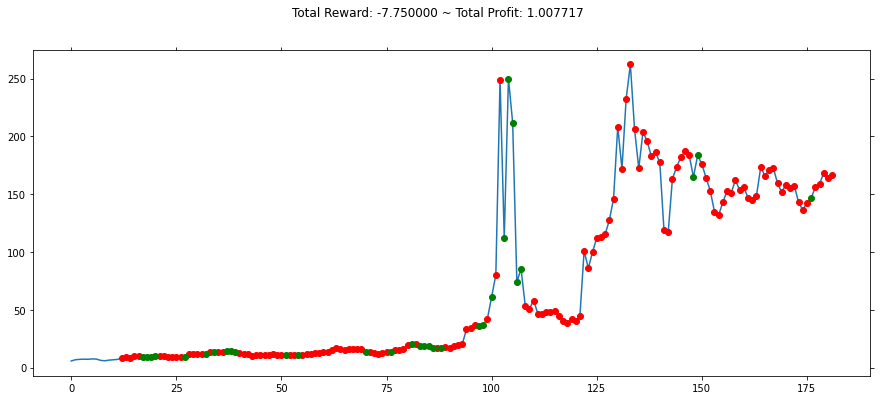

In [32]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()


In [33]:
! git add GEstocksTrader.ipynb
! git commit -m "Please see last commit as well."
! git push origin main

The file will have its original line endings in your working directory
error: pathspec 'Please see last commit as well.' did not match any file(s) known to git
fatal: unable to access 'https://github.com/sumit-mandal/Reinforcement-Learning-Project/': Could not resolve host: github.com
